# Heart Disease Prediction

Problem Statement :Build a system that can predict if a patient has heart disease. Explore the data, understand the features, and figure out an approach.

Objective:

In [1]:
#Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data
df =pd.read_csv("/content/drive/MyDrive/Unified Mentor Projects/Data files/Heart disease dataset.csv")

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

<Axes: >

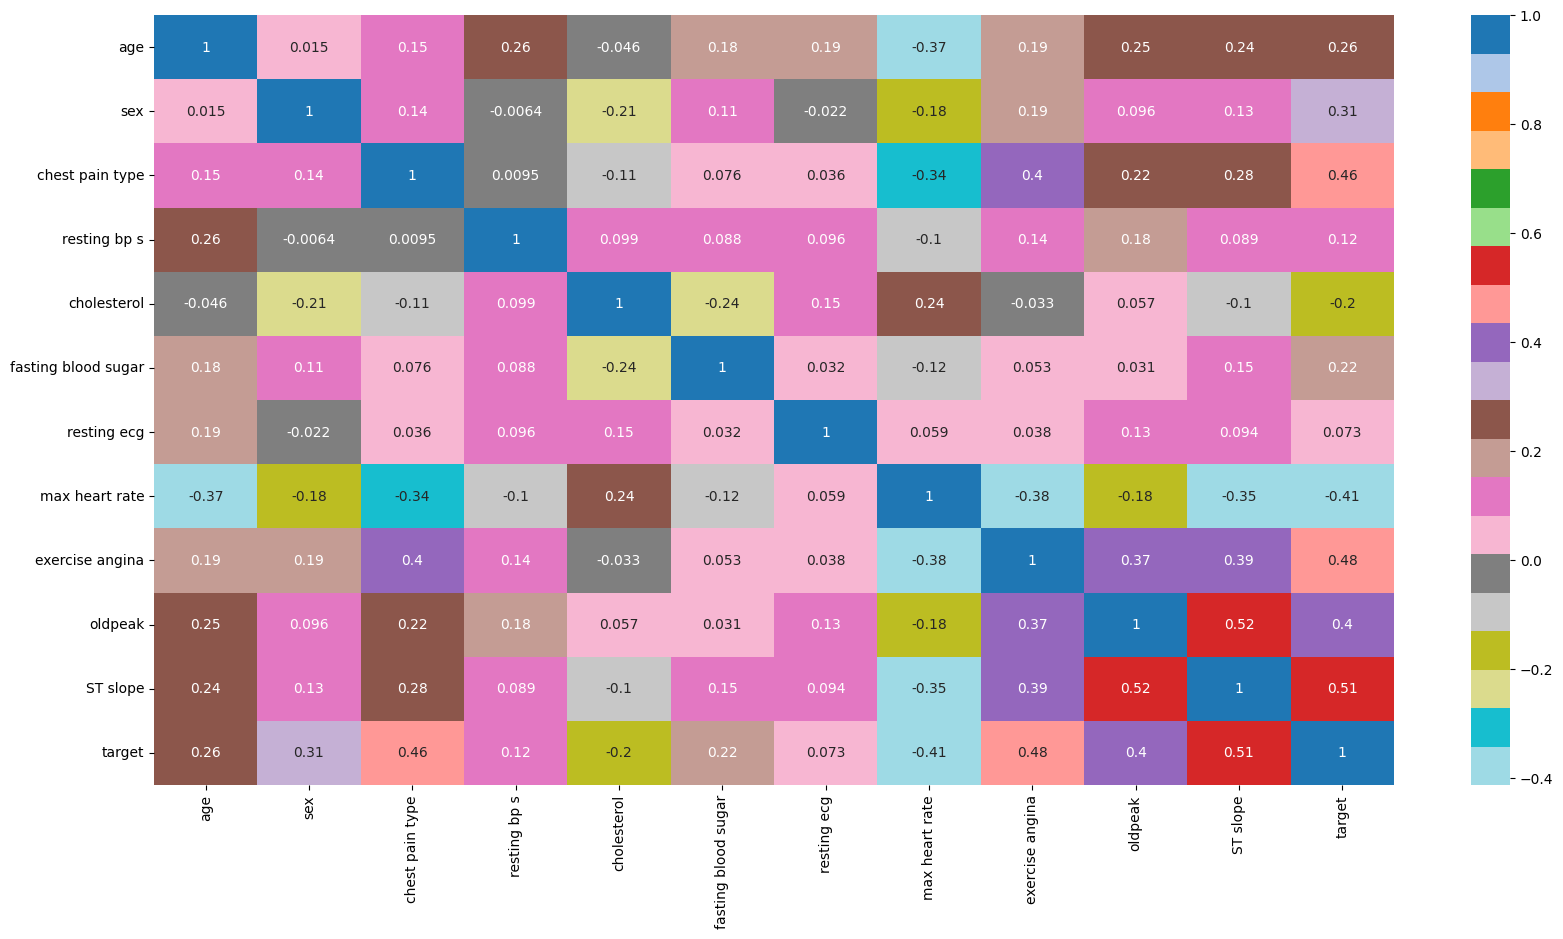

In [9]:
corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.tab20_r)

In [ ]:
# checking the distribution of Target Variable
df['target'].value_counts()

,count
target,
1,629
0,561


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
print(X)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [ ]:
print(y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [ ]:
df["target"].unique()

array([0, 1])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'resting ecg' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

/tmp/ipython-input-23-3728803517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="Set2")  # Use x= instead of passing y directly


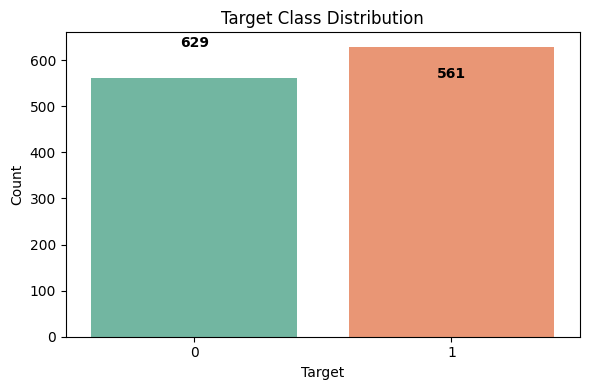

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"], palette="Set2")

# Add count labels on bars
target_temp = df["target"].value_counts()
for i, v in enumerate(target_temp):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.title("Target Class Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [ ]:
target_temp = df.target.value_counts()

print(target_temp)

target
1    629
0    561
Name: count, dtype: int64


In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/1190,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/1190,2)))



Percentage of patients without heart problems: 47.14
Percentage of patients with heart problems: 52.86


We will analyse the other features

### Analysing the 'Sex' feature

In [ ]:
df["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

/tmp/ipython-input-29-1452587869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="target", data=df, estimator=lambda x: sum(x)/len(x), palette="Set2")


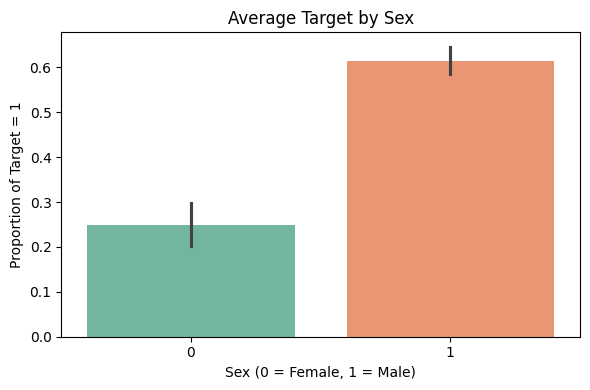

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="target", data=df, estimator=lambda x: sum(x)/len(x), palette="Set2")

plt.title("Average Target by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
df["chest pain type"].unique()

array([2, 3, 4, 1])

##### As expected, the CP feature has values from 1 to 4

/tmp/ipython-input-33-4195426747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="chest pain type", y="target", data=df, estimator=lambda x: sum(x)/len(x), palette="pastel")


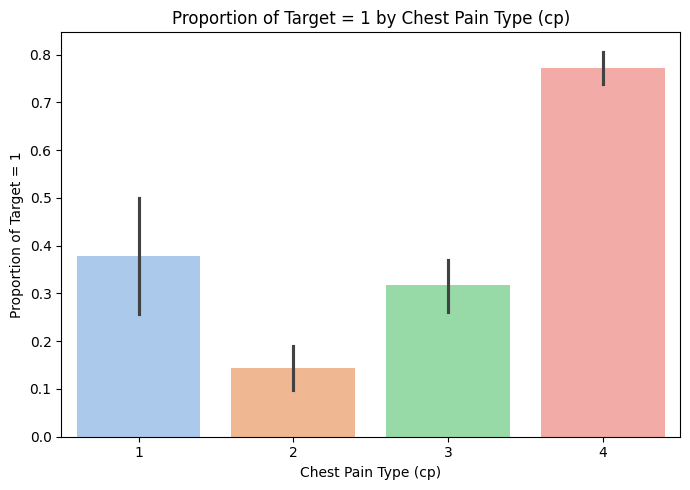

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x="chest pain type", y="target", data=df, estimator=lambda x: sum(x)/len(x), palette="pastel")

plt.title("Proportion of Target = 1 by Chest Pain Type (cp)")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

##### We notice, that chest pain of '2', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
df["fasting blood sugar"].describe()

,fasting blood sugar
count,1190.000000
mean,0.213445
std,0.409912
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df["fasting blood sugar"].unique()

array([0, 1])

/tmp/ipython-input-41-4137517777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fasting blood sugar", y="target", data=df, palette="muted")


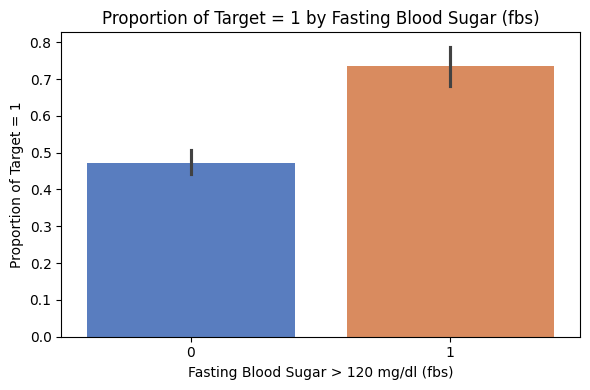

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="fasting blood sugar", y="target", data=df, palette="muted")

plt.title("Proportion of Target = 1 by Fasting Blood Sugar (fbs)")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl (fbs)")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

### Analysing the restecg feature

In [ ]:
df["resting ecg"].unique()

array([0, 1, 2])

/tmp/ipython-input-40-2658479996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="resting ecg", y="target", data=df, palette="Set2")


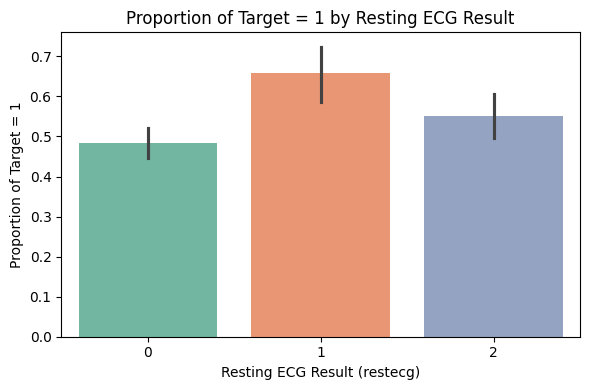

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="resting ecg", y="target", data=df, palette="Set2")

plt.title("Proportion of Target = 1 by Resting ECG Result")
plt.xlabel("Resting ECG Result (restecg)")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
df["exercise angina"].unique()

array([0, 1])

/tmp/ipython-input-45-4191850272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="exercise angina", y="target", data=df,palette="coolwarm")


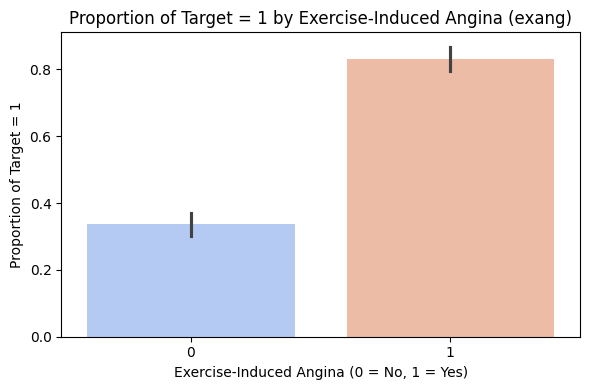

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="exercise angina", y="target", data=df,palette="coolwarm")

plt.title("Proportion of Target = 1 by Exercise-Induced Angina (exang)")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
df["ST slope"].unique()

array([1, 2, 3, 0])

/tmp/ipython-input-47-2569967234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ST slope", y="target", data=df, palette="crest")


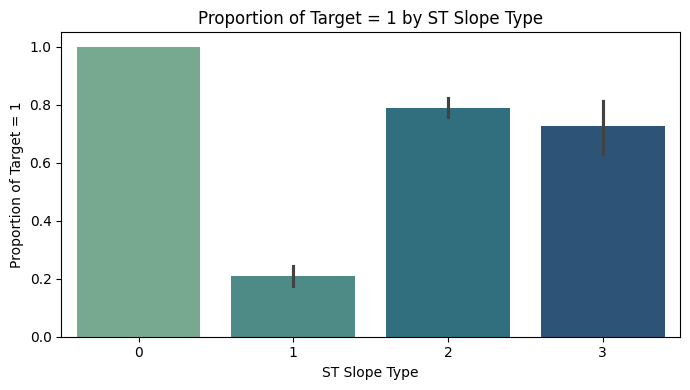

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(x="ST slope", y="target", data=df, palette="crest")

plt.title("Proportion of Target = 1 by ST Slope Type")
plt.xlabel("ST Slope Type")
plt.ylabel("Proportion of Target = 1")
plt.tight_layout()
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

## IV. Train Test split

In [10]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [11]:
X_train.shape

(952, 11)

In [ ]:
X_test.shape

(238, 11)

In [12]:
y_train.shape

(952,)

In [ ]:
y_test.shape


(238,)

## V. Model Fitting

In [13]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
Y_pred_lr.shape

(238,)

In [16]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.19 %


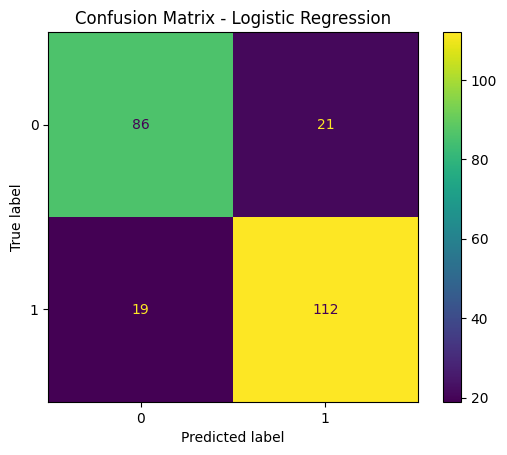

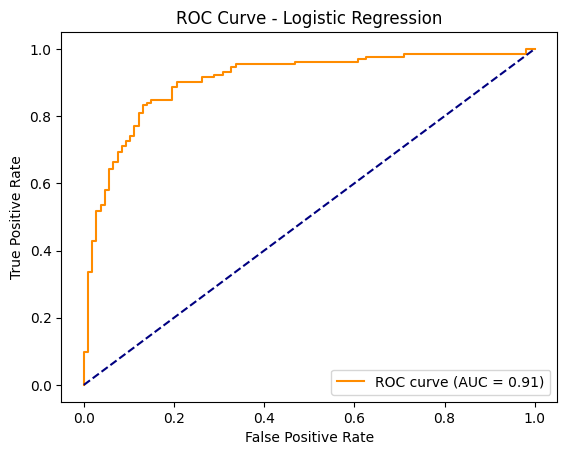

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_lr = lr.predict(X_test)
Y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [19]:
Y_pred_nb.shape

(238,)

In [20]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.71 %


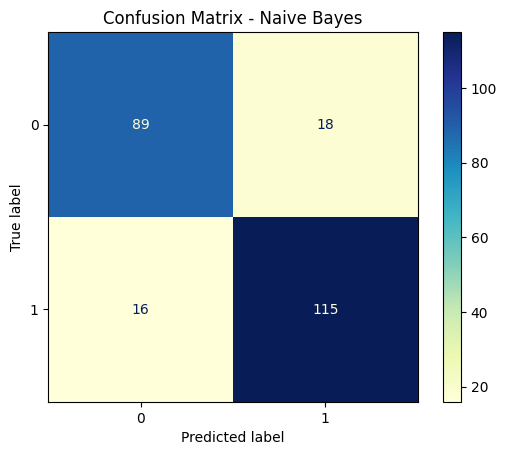

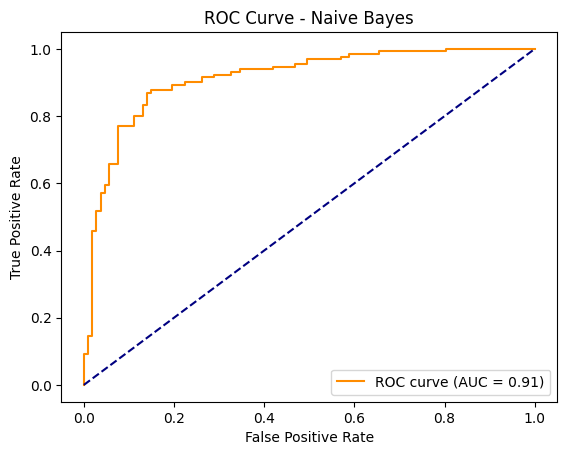

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_nb= nb.predict(X_test)
Y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### SVM

In [49]:
from sklearn.svm import SVC

# Redefine with probability=True
sv = SVC(kernel='rbf', probability=True, random_state=42)

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [50]:
Y_pred_svm.shape

(238,)

In [51]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 72.69 %


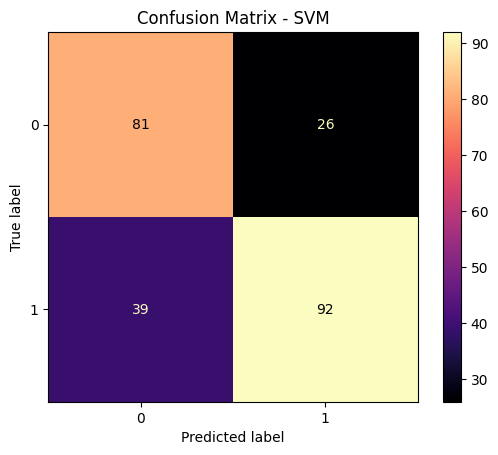

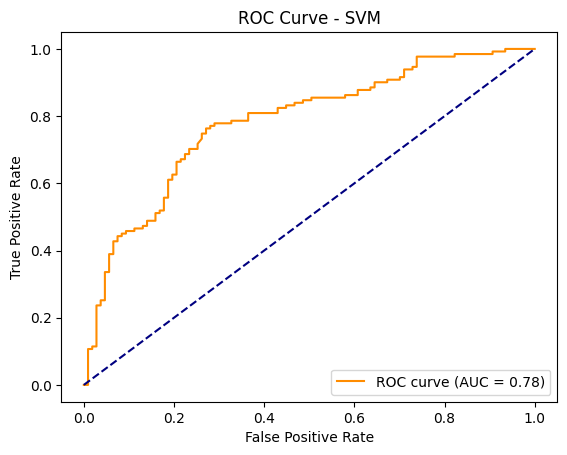

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_sv = sv.predict(X_test)
Y_prob_sv = sv.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_sv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.title("Confusion Matrix - SVM")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_sv)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


### K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [32]:
Y_pred_knn.shape

(238,)

In [34]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.95 %


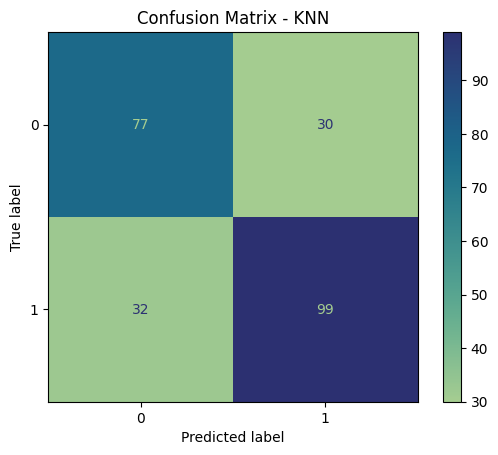

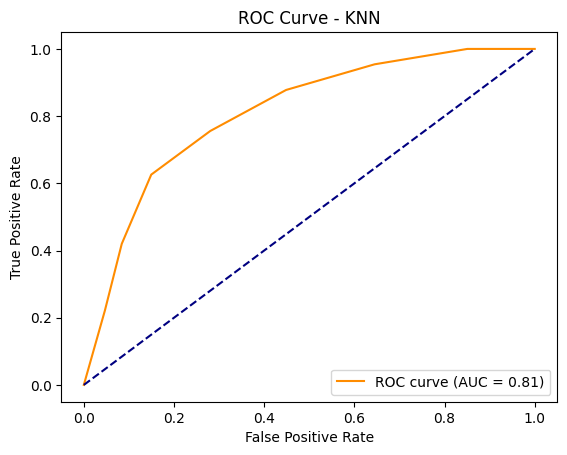

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_knn = knn.predict(X_test)
Y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='crest')
plt.title("Confusion Matrix - KNN")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [41]:
print(Y_pred_dt.shape)


(238,)


In [42]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 92.02 %


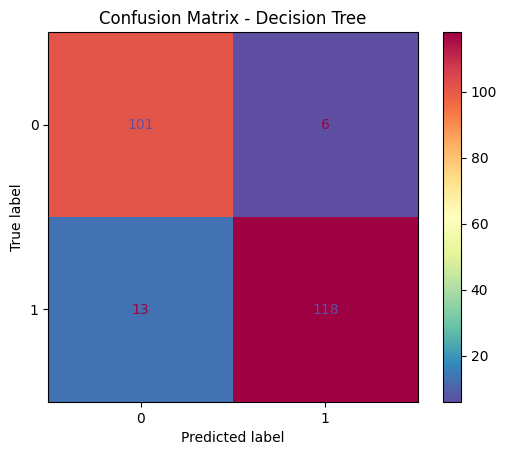

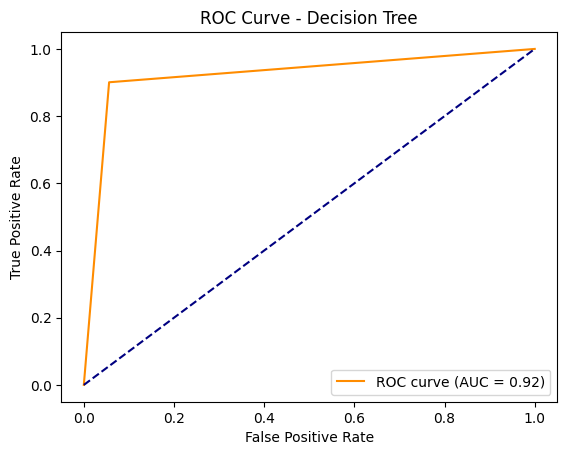

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_dt = dt.predict(X_test)
Y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Spectral_r')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [83]:
Y_pred_rf.shape

(238,)

In [84]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 96.22 %


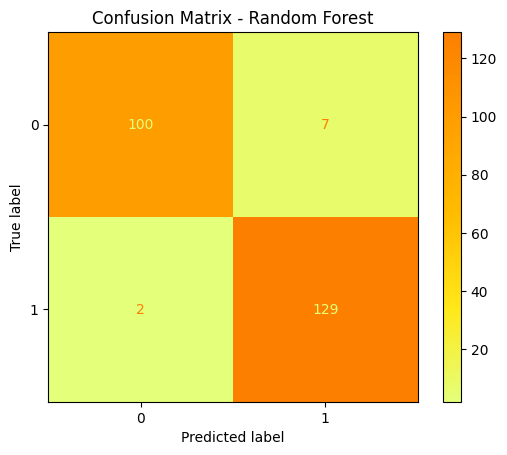

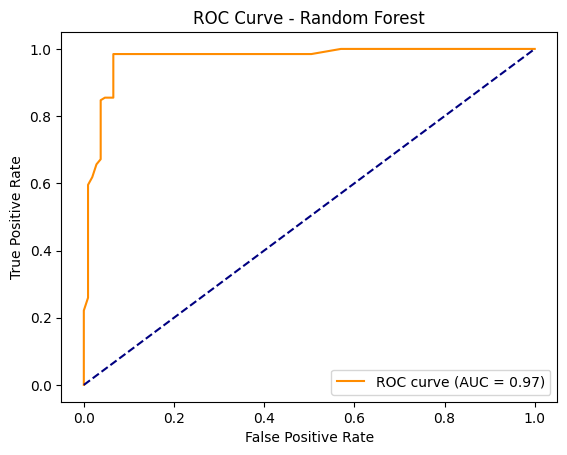

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_rf = rf.predict(X_test)
Y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Wistia')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### XGBoost

In [77]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [78]:
Y_pred_xgb.shape

(238,)

In [79]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.86 %


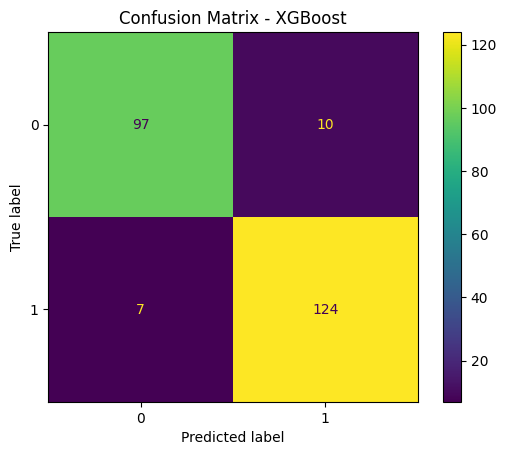

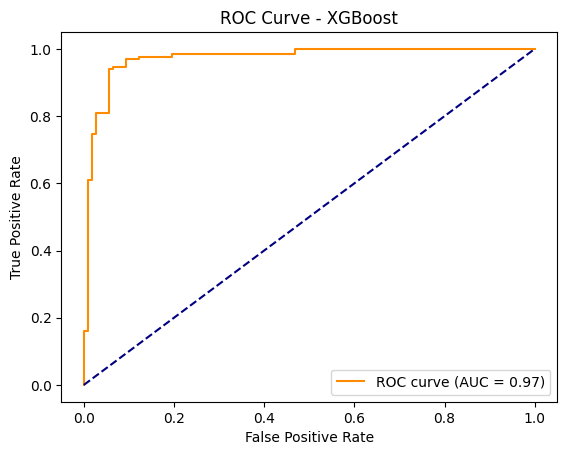

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels and probabilities
Y_pred_xgb = xgb_model.predict(X_test)
Y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5308 - loss: 7.6347
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 1.3897 
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 1.1858 
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6412 - loss: 0.9169
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.8474
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.7952
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.6475
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7544 - loss: 0.6225
Epoch 9/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.6288
Epoch 10/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7640 - loss: 0.7211
Epoch 11/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7831 - loss: 0.5635
Epoch 12/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

In [69]:
Y_pred_nn = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [70]:
Y_pred_nn.shape

(238, 1)

In [71]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [72]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 84.45 %


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


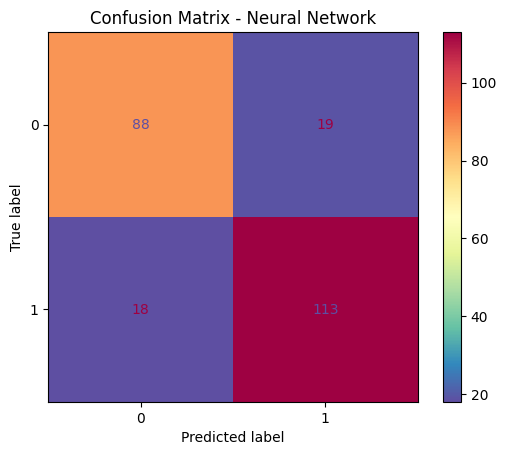

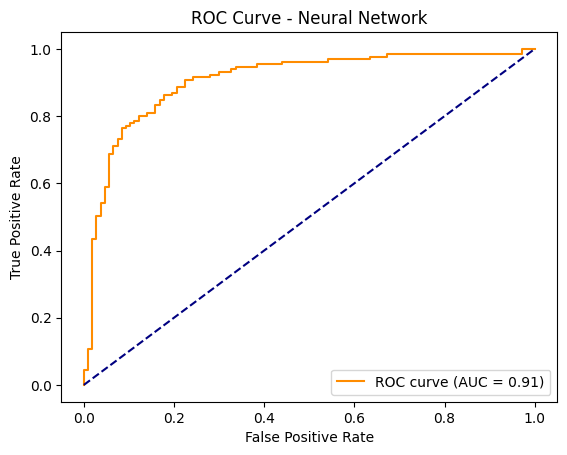

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities using Keras model
Y_prob_nn = model.predict(X_test).ravel()  # Flatten to shape (n_samples,)
Y_pred_nn = (Y_prob_nn >= 0.5).astype(int)  # Convert probabilities to binary labels

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Spectral_r')
plt.title("Confusion Matrix - Neural Network")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Y_prob_nn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()



## VI. Output final score

In [76]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.19 %
The accuracy score achieved using Naive Bayes is: 85.71 %
The accuracy score achieved using Support Vector Machine is: 72.69 %
The accuracy score achieved using K-Nearest Neighbors is: 73.95 %
The accuracy score achieved using Decision Tree is: 92.02 %
The accuracy score achieved using Random Forest is: 96.22 %
The accuracy score achieved using XGBoost is: 92.86 %
The accuracy score achieved using Neural Network is: 84.45 %


/tmp/ipython-input-105-1618862462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette=colors)


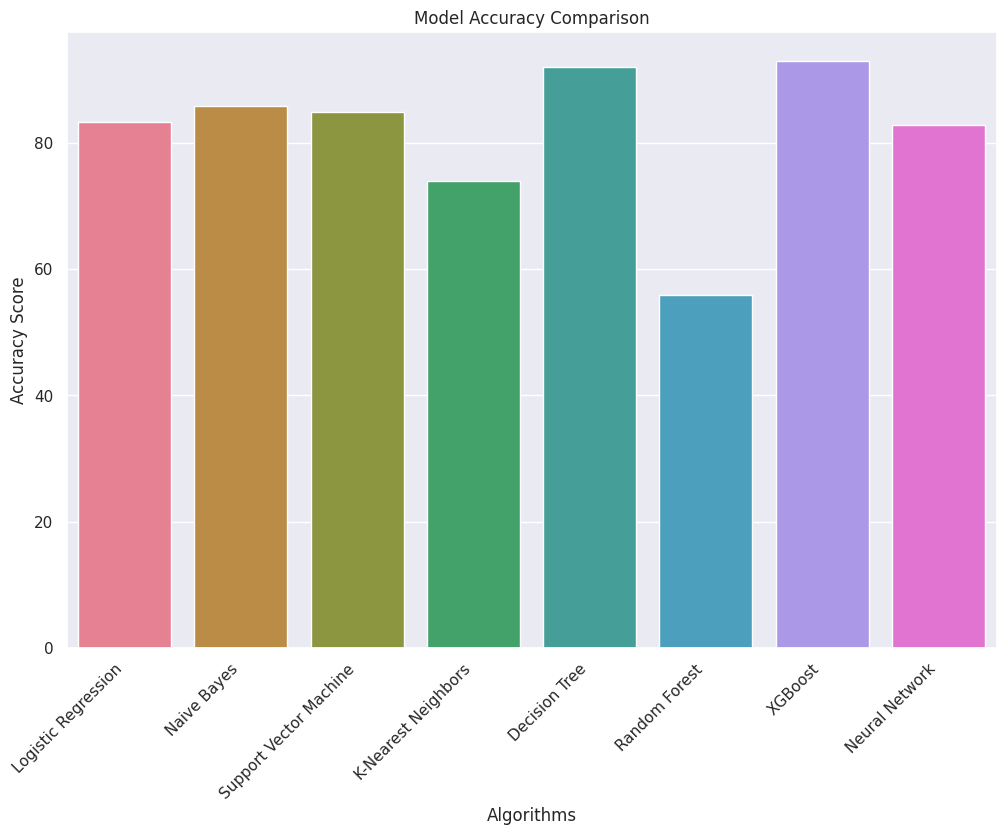

In [ ]:
# Set the figure size
sns.set(rc={'figure.figsize': (12, 8)})

# Create a color palette
colors = sns.color_palette("husl", n_colors=len(algorithms))

# Create barplot with custom colors
sns.barplot(x=algorithms, y=scores, palette=colors)

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.show()

XG Boost provides good results as compared to other algorithms.

In [ ]:
import xgboost as xgb
import joblib

# Assuming your model is stored in a variable like `xgb_model`
joblib.dump(xgb_model, "xgb_heart_model.pkl")

['xgb_heart_model.pkl']